Griffin Shelor\
2-4-2024

# In-class Exercises: File I/O

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import string
import os

### Q1. Read the file 'lecture17_hamlet_english.txt' and print the first 15 lines with newline characters ('\n') removed.

* Note: some of the lines are blank. This is ok! (Typical for the opening lines of a play).

In [2]:
# reading the hamlet_english file
hamlet = open('lecture17_Hamlet_english.txt', 'r')

for x in range(15):
    print(hamlet.readline())

THE TRAGEDY OF HAMLET, PRINCE OF DENMARK





by William Shakespeare







Dramatis Personae



  Claudius, King of Denmark.

  Marcellus, Officer.

  Hamlet, son to the former, and nephew to the present king.

  Polonius, Lord Chamberlain.

  Horatio, friend to Hamlet.

  Laertes, son to Polonius.



### Q2. Read the files 'lecture17_hamlet_english.txt' and 'lecture17_hamlet_german.txt' and make a list of words for each. 

* In these lists, remove the periods (".") and newlines ("\n") but don't worry about removing other forms of punctuation. 
* Print the length of each list when you are done (don't print the words themselves: there are too many!)

In [3]:
# reading the hamlet_english file
hamlet_eng = open('lecture17_Hamlet_english.txt', 'r')

# reading the hamlet_german file
hamlet_ger = open('lecture17_Hamlet_german.txt', 'r')

## placing lines in lists with readlines
hamlet_eng_lines = hamlet_eng.readlines()
hamlet_ger_lines = hamlet_ger.readlines()

## removing unwanted characters 
for index in range(len(hamlet_eng_lines)):
    hamlet_eng_lines[index] = hamlet_eng_lines[index].replace('.','')
    hamlet_eng_lines[index] = hamlet_eng_lines[index].replace('\n', '')
while '' in hamlet_eng_lines:
    hamlet_eng_lines.remove('')
## initializing empty string
hamlet_eng_string = str()
for index in range(len(hamlet_eng_lines)):
    if index == 0:
        hamlet_eng_string += hamlet_eng_lines[index]
    else:
        hamlet_eng_string += " "
        hamlet_eng_string += hamlet_eng_lines[index]
hamlet_eng_words = hamlet_eng_string.split()

## same for german hamlet
for index in range(len(hamlet_ger_lines)):
    hamlet_ger_lines[index] = hamlet_ger_lines[index].replace('.','')
    hamlet_ger_lines[index] = hamlet_ger_lines[index].replace('\n', '')
while '' in hamlet_ger_lines:
    hamlet_ger_lines.remove('')
## initializing empty string
hamlet_ger_string = str()
for index in range(len(hamlet_ger_lines)):
    if index == 0:
        hamlet_ger_string += hamlet_ger_lines[index]
    else:
        hamlet_ger_string += " "
        hamlet_ger_string += hamlet_ger_lines[index]
hamlet_ger_words = hamlet_ger_string.split()

print(len(hamlet_eng_words))
print(len(hamlet_ger_words))


31955
33545


### Q3. Convert each word list from Q2 to numpy `arrays`, and print the number of unique words in each array using the function `np.unique(...)`.

In [4]:
## converting to arrays
eng_words_np = np.array(hamlet_eng_words)
ger_words_np = np.array(hamlet_ger_words)

## printing number of unique words
print(len(np.unique(eng_words_np)))
print(len(np.unique(ger_words_np)))

7231
8616


### Q4. Make two new `arrays` containing the length of each word in the arrays from Q3.  Then print the mean word length of the English and German versions of Hamlet using only 1 value after the decimal.

* Note: You may chose to use the full word lists or unique word lists for this exercise (or both).

In [5]:
## measuring length of each word in word arrays
eng_wordlength = eng_words_np.copy()
for index in range(len(eng_words_np)):
    eng_wordlength[index] = len(eng_words_np[index])
eng_wordlength = eng_wordlength.astype(int)
print(round(np.mean(eng_wordlength), 1))

## same for german
ger_wordlength = ger_words_np.copy()
for index in range(len(ger_words_np)):
    ger_wordlength[index] = len(ger_words_np[index])
ger_wordlength = ger_wordlength.astype(int)
print(round(np.mean(ger_wordlength),1))

4.3
5.3


### Q5. Using the data in the cell below, output a text file of student names and mean test scores. 

* Format the output so that the columns line up nicely and the mean test scores have 1 number after the decimal. 
* Print each output line within the notebook to check if the alignment is ok.
* [Note that while you should create a new file for output in this question, you do not need to upload the result to WebCampus]

#### We will use these arrays for Q5. 

* Each row in the `test_scores` array are the grades for a different test
* Each column are the grades for a different student. 
* There are three tests and five students.

In [6]:
students = ['Jin', 'Cameron', 'Ricardo', 'Mary', 'Kiri']
test_scores = np.array([[85, 88, 95, 70, 70],
                       [95, 87, 98, 60, 80],
                       [75, 89, 96, 0, 95]])

In [7]:
mean_scores = np.mean(test_scores, axis = 0)

## creating txt file for test scores
testscores = open("testscores.txt", 'w')
for student, score in zip(students, mean_scores):
    testscores.write(f"{student:<10} {score:.1f}\n")
testscores.close()

testscores = open("testscores.txt", 'r')
for i in range(5):
    print(testscores.readline())

Jin        85.0

Cameron    88.0

Ricardo    96.3

Mary       43.3

Kiri       81.7



### Q6. Examine the file 'lecture17_image.txt'. The first line has information about the number of x values and the second line about the number of y values. 

* Use the Python file I/O functions from lecture to read in these first two lines to your notebook, and convert each line to integer variables `nx` and `ny` with the corresponding values. 
* Print `nx` and `ny`
* Close the file.

In [8]:
image = open('lecture17_image.txt', 'r')
for x in range(1):
    nx = image.readline()
    ny = image.readline()

print(nx)
print(ny)
image.close()

nx 254

ny 174



### Q7. Use `np.loadtxt(...)` to read in the remaining values in 'lecture17_image.txt', skipping the first 2 lines. 

* Reshape your array to a size (ny, nx). 
* Plot the array using `plt.imshow()` with a colormap `plt.cm.gray`.

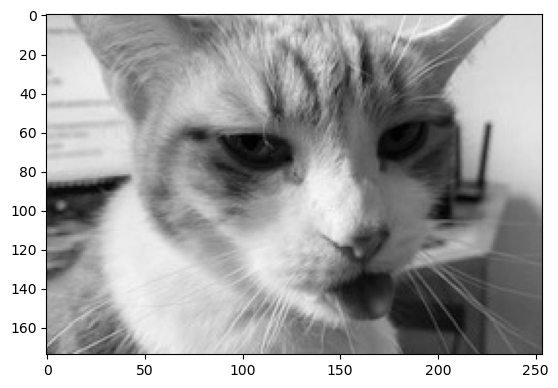

In [10]:
## reading in values
image = np.loadtxt('lecture17_image.txt', skiprows = 2)
image = image.reshape((174,254))

plt.imshow(image, cmap = plt.cm.gray);

### Save your notebook and output an html version. To receive credit for this in-class exercise upload both the .html and .ipynb files.